In [152]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt, patches
from datetime import datetime
from dateutil.parser import parse
from cartopy import crs, feature

%matplotlib inline

In [2]:
plt.rcParams['font.size'] = 14

In [154]:
url = 'http://soggy.zoology.ubc.ca:8080/geonetwork/srv/api/records'
ID = 'ad4ca26d-ff63-4cf2-85af-b892c314b596'
fn = 'dfo_bottle_data_2017.xlsx'
raw = pd.read_excel(os.path.join(url, ID, 'attachments', fn))

In [156]:
keys = ['long', 'lat', 'depth_metres', 'temperature_degc', 'nitrate_plus_nitrite_umol_l']
nanindex = ~np.isnan(raw['depth_metres'])
time = np.array([parse(t) for t in raw['datetime'][nanindex].values])
lon, lat, depth, temperature, nitrate = [raw[key][nanindex].values for key in keys]

In [157]:
index1 = (lon < -124.1) & (lon > -124.8) & (lat < 49.45) & (lat > 49.3) & (depth < 5)
index2 = (lon < -124.1) & (lon > -124.8) & (lat < 50) & (lat > 49.65) & (depth < 5)

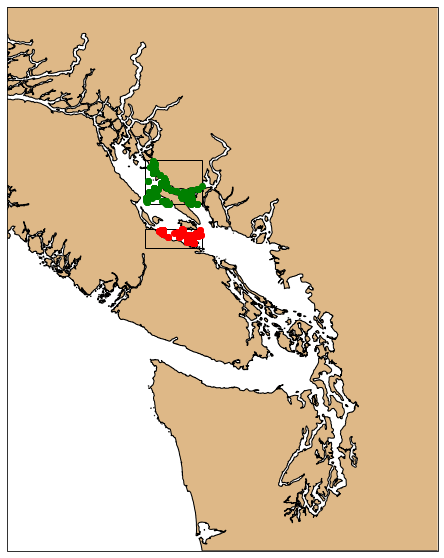

In [158]:
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
proj, proj_ref = crs.Mercator(np.mean(xlim), *ylim), crs.PlateCarree()
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': proj})
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood', zorder=0))
ax.add_patch(patches.Rectangle((-124.8, 49.3), 0.7, 0.15, fill=False, transform=crs.PlateCarree()))
ax.add_patch(patches.Rectangle((-124.8, 49.65), 0.7, 0.35, fill=False, transform=crs.PlateCarree()))
ax.plot(lon[index1], lat[index1], 'ro', transform=crs.PlateCarree())
ax.plot(lon[index2], lat[index2], 'go', transform=crs.PlateCarree())

(735599.0, 736695.0)

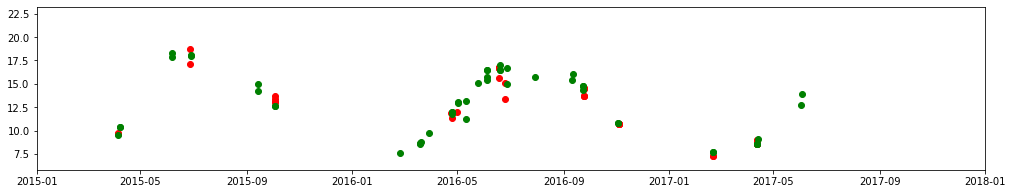

In [159]:
fig, ax = plt.subplots(figsize=(17, 3))
ax.plot(time[index1], temperature[index1], 'ro')
ax.plot(time[index2], temperature[index2], 'go')
ax.set_xlim([datetime(2015, 1, 1), datetime(2018, 1, 1)])